# <center> <img src='../images/fsktm.jpg' width="500" height="400"> </center>
# <center> WQD7002 - SCIENCE DATA RESEARCH PROJECT </center>
## <center> NEURAL RUBIK’S </center>
## <center> Solving Rubik's Cube Using Nueral Network (Hueristic Learning) </center>
### <center> Scripted by : Gunasegarran Magadevan (WQD170002) </center>
### <center> Supervised by : Dr.Aznul Qalid Md Sabri </center>
# <center> <img src="../images/RubiksNeural.jpg" width="400" height="300"> </center>
----



### STEP 1 : Installing and upgrading the package

In [0]:
# Upgrading the pip package to the latest version
!python -m pip install PyHamcrest --upgrade --quiet
!python -m pip install tensorflow --upgrade --quiet
!python -m pip install rubikai --no-cache-dir --upgrade --quiet
!python -m pip install seaborn --no-cache-dir --upgrade --quiet
!python -m pip install keras --upgrade --quiet
!python -m pip install numpy --upgrade --quiet
!pip install -U -q PyDrive

# Tensorflow package manually through terminal or cmd - https://anaconda.org/conda-forge
#conda install -c conda-forge tensorflow
#conda install -c conda-forge numpy

    100% |████████████████████████████████| 61kB 2.9MB/s 
    100% |████████████████████████████████| 993kB 23.6MB/s 


### STEP 2 : Importing the package

In [0]:
# Importing packages
import rubikai as rubik             # To use Rubik's Cube features and Heuristic search.
import numpy as np                  # To manipulate large multi-dimensional arrays .
import pandas as pd                 # To use data structures and data analysis tools.
import keras                        # High-level neural networks.  
import seaborn as sns               # To create statistical graphics.
import matplotlib.pyplot as plt     # To create 2D graphics.
             

Using TensorFlow backend.


### STEP 3 : Rubik's Cube Module

In [0]:
# Set as 3Dim (3x3)
dimCube = 3 

#### STEP 3.1 : Randomly 

In [0]:
# Manually scrambled
notation1 = "U L B' R' F"
print('Applying sequence:', notation1)
sampleCube1 = rubik.Cube(dimCube).apply(notation1)
print(sampleCube1)

Applying sequence: U L B' R' F
    GGG
    YOG
    WWW

WGB OOO GOO YRR
RGR WWB OBB RYY
RGB OOG RBB RYY

    YYY
    WRW
    BBW



In [0]:
# Randomly scrambled
scrambe = 4
notation2 = rubik.generate_random_sequence(dimCube, scrambe)
print('Applying random sequence:', notation2)
sampleCube2 = rubik.Cube(dimCube).apply(notation2)
print(sampleCube2)

Applying random sequence: [U', F, F, R]
    OOW
    OOW
    RRG

YYB WWO YGG RBB
GGB WWR BBW OYY
GGW GGR BBW OYY

    OOY
    RRY
    RRB



In [0]:
# Clean
del sampleCube1, sampleCube2

### STEP 4 : Rubik's Cube Solver

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = 'https://drive.google.com/open?id=1zCIQK7OxeRYx-n1R_IdV2B12HRWFFSxc' # The shareable link

fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('3_25_70_60_50.h5') 

1zCIQK7OxeRYx-n1R_IdV2B12HRWFFSxc


In [0]:
model = keras.models.load_model('3_25_70_60_50.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [0]:
def get_features_from_cube(cube):
  binary_array = keras.utils.to_categorical(cube.to_array(), rubik.NUM_FACES)
  return binary_array.flatten()

# Defining Heuristic
def model_h(cube, problem=None):
  features = get_features_from_cube(cube)
  return model.predict(np.reshape(features, (1, -1)))[0][0]

In [0]:
scramble = np.random.randint(10)

cube3 = rubik.Cube()
rand_seq = rubik.generate_random_sequence(3, scramble)
print('Generated random sequence:', rand_seq)
cube3.apply(rand_seq)
print('Solving...')
rubik.solve(cube3, model_h, verbose=True);

Generated random sequence: [L', U]
Solving...
Length 2 solution found:
U' L
Expanded 2 nodes.


In [0]:
# Clean
del model, model_h, cube3, rand_seq

### STEP 5: Heuristics Used For Rubik's cube

### Admissible Heuristics

*   __`h_1`:__  
$$ 
h_1(c) = \max_{f\in\text{Faces}(c)}\#\text{misplaced-edges}(f) 
$$
Maximum over faces of the number of misplaced edge squares in each face.

*   __`h_2`:__  
$$
\begin{align}
h_2(c) =& \max_{f\in\text{Faces}(c)}\#\text{misplaced-corners}(f) 
\end{align}
$$
Sum of max and min of the number of misplaced edge squares in each face.

### Inadmissible Heuristics
*   __`h_3`:__  
$$
\bar h_3(c) = \max_{f\in\text{Faces}(c)} \left[\#\text{misplaced-edges}(f) + \#\text{misplaced-corners}(f) \right]
$$
Maximum over faces of the number of misplaced edge squares plus the number of misplaced corner squares in each face.

*   __`h_4`:__  
$$
\begin{align}
\bar h_4(c) =& \max_{f\in\text{Faces}(c)}\left[ \#\text{misplaced-edges}(f) + \#\text{misplaced-corners}(f) \right] + \\
                      & \min_{f\in\text{Faces}(c)}\left[ \#\text{misplaced-edges}(f) + \#\text{misplaced-corners}(f) \right] 
\end{align}
$$
Sum of max and min of the number of misplaced edge squares plus the number of misplaced corner squares in each face.

*   __`h_5`:__   
$$
\bar h_5(c) = \max_{f\in\text{Faces}(c)}\#\text{misplaced-edges}(f) +  \max_{f\in\text{Faces}(c)} \#\text{misplaced-corners}(f)
$$
Maximum over faces of the number of misplaced edge squares in each face plus maximum over faces of the number of misplaced corner squares in each face




In [0]:
def h_1(cube, problem=None):
    result = {}
    for face in rubik.Face:
        face_array = cube.get_face(face)
        cross = [(0, 1), (1, 0), (1, 2), (2, 1)]
        result[face] = sum(face_array[c] != face_array[1, 1] for c in cross)
    return max(result.values())
  

def h_2(cube, problem=None):
    result = {}
    for face in rubik.Face:
        face_array = cube.get_face(face)
        corners = [(0,0), (0,2), (2,0), (2,2)]
        result[face]  = sum(face_array[c] != face_array[add_c(c[0]),c[1]] and face_array[c] != face_array[c[0],add_c(c[1])]  for c in corners)
          
    return max(result.values())


def add_c(i):
  if i == 0:
    return i+1
  elif i == 2:
    return i-1
  else:
    return i
  
def h_3(cube, problem=None):
    result = {}
    for face in rubik.Face:
        face_array = cube.get_face(face)
        cross = [(0, 1), (1, 0), (1, 2), (2, 1)]
        result[face] = sum(face_array[c] != face_array[1, 1] for c in cross)
        corners = [(0,0), (0,2), (2,0), (2,2)]
        result[face]  += sum(face_array[c] != face_array[add_c(c[0]),c[1]] and face_array[c] != face_array[c[0],add_c(c[1])]  for c in corners)
          
    return max(result.values())

def h_4(cube, problemtt=None):
    result = {}
    for face in rubik.Face:
        face_array = cube.get_face(face)
        cross = [(0, 1), (1, 0), (1, 2), (2, 1)]
        result[face] = sum(face_array[c] != face_array[1, 1] for c in cross)
        corners = [(0,0), (0,2), (2,0), (2,2)]
        result[face]  += sum(face_array[c] != face_array[add_c(c[0]),c[1]] and face_array[c] != face_array[c[0],add_c(c[1])]  for c in corners)
        
    return max(result.values())+min(result.values())    
  
def h_5(cube, problem=None):
    result_edges = {}
    result_corners = {}
    for face in rubik.Face:
        face_array = cube.get_face(face)
        cross = [(0, 1), (1, 0), (1, 2), (2, 1)]
        result_edges[face] = sum(face_array[c] != face_array[1, 1] for c in cross)
        corners = [(0,0), (0,2), (2,0), (2,2)]
        result_corners[face] = sum(face_array[c] != face_array[add_c(c[0]),c[1]] and face_array[c] != face_array[c[0],add_c(c[1])]  for c in corners)
        
    return max(result_edges.values())+max(result_corners.values())

#### STEP 5.1 : Heuristics Comparison

In [0]:
def compare_and_plot(heuristics, iterations, d_range, title):
  # compare the heuristics
  df = rubik.compare_heuristics(
      heuristics=heuristics,
      cube_layers=3,
      d_values=d_range,
      iterations=iterations
  )
  # plot the results
  sns.barplot(x='num_scrambles', y='expansions', 
              hue='heuristic_name', data=df).set_yscale('log');
  plt.title('Heuristics Comparison\n' + title + '\n' + 
            'Average over %d iterations' % iterations);
  return df

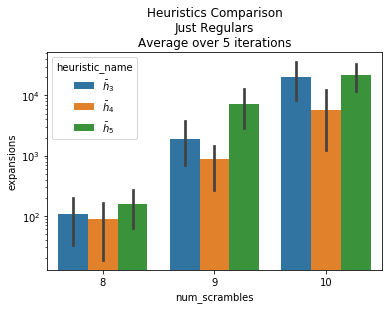

In [0]:
iterations = 5
d_values = np.arange(8, 11)
heuristics = {r'$\bar h_3$': h_3,
              r'$\bar h_4$': h_4,
              r'$\bar h_5$': h_5}

df2 = compare_and_plot(heuristics, iterations, d_values, 'Just Regulars');

###### $Observation$
Based on the observation above it's clear that the admissible heuristics can't handle scrambles of more than 6 moves.

From the inadmissible heuristics, it seems that $\bar h_4$ has performed the best in terms of node expansions, therefore *inadmissible* is winner.